# MAD AD Results Analysis

This notebook aggregates generated results from `core/mad_generated_ads`, computes evaluation metrics via `ADEvaluator`, and visualizes distributions and per-movie performance.

In [2]:
import os, json, glob
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from evaluate_ads import ADEvaluator

RESULTS_DIR = Path('mad_generated_ads')
assert RESULTS_DIR.exists(), f'Not found: {RESULTS_DIR}'

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\nikhi\projects\AI-Video-Describer\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Discover result files
result_files = sorted(str(p) for p in RESULTS_DIR.glob('*.json'))
len(result_files), result_files[:5]

(13,
 ['mad_generated_ads\\10142_results.json',
  'mad_generated_ads\\10142_results_2025-11-09_22-07-02.json',
  'mad_generated_ads\\10142_results_2025-11-09_22-50-02.json',
  'mad_generated_ads\\10142_results_2025-11-09_23-20-34.json',
  'mad_generated_ads\\10142_results_2025-11-09_23-54-08.json'])

In [12]:
# Evaluate all files and collect per-shot metrics
evaluator = ADEvaluator()
all_rows = []
summaries = []
ind = 0
for path in result_files:
    try:
        res = evaluator.evaluate_file(path, detailed=True)
        if not res:
            continue
        movie_id = res.get('movie_id', 'unknown')
        avg = res.get('avg_scores', {})
        std = res.get('std_scores', {})
        summaries.append({'movie_id': movie_id, **{f'avg_{k}': v for k,v in avg.items()}, **{f'std_{k}': v for k,v in std.items()}, 'evaluated_shots': res.get('evaluated_shots', 0)})
        rows = res.get('all_scores') or []
        for r in rows:
            r2 = {**r}
            r2['movie_id'] = movie_id
            all_rows.append(r2)
    except Exception as e:
        print(f'Failed on {path}: {e}')
    ind+=1
    if(ind==6):
        break

df = pd.DataFrame(all_rows)
df_summary = pd.DataFrame(summaries)
df.shape, df_summary.shape



EVALUATING: mad_generated_ads\10142_results.json

Movie ID: 10142
Total shots: 50
  With ground truth: 21
  Without ground truth: 29
  Failed generation: 0


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=21)

📊 Language Similarity:
  bleu1          : 0.2849 ± 0.2110
  bleu2          : 0.1890 ± 0.2167
  bleu4          : 0.1236 ± 0.1909
  meteor         : 0.2843 ± 0.2350
  bertscore_f1   : 0.2954 ± 0.2277
  cider          : 1.2259 ± 1.8206

📊 ROUGE Scores:
  rouge1         : 0.3740 ± 0.2448
  rouge2         : 0.1931 ± 0.2452
  rougeL         : 0.3156 ± 0.2332

📊 Token Overlap:
  token_precision: 0.3128 ± 0.2423
  token_recall   : 0.3733 ± 0.2342
  token_f1       : 0.3285 ± 0.2270

📊 Length Statistics:
  gen_length     : 26.86 ± 7.18
  ref_length     : 21.90 ± 6.71
  length_ratio   : 1.45 ± 0.97

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  4. Shot 9 @ 71.0s | bleu4=0.321
     Generated: A figure is seen dropping someone, then quickly grabbing and engaging with nearby guards, amidst the swift motion of limbs and blades.
     Reference: Female character, he enhances the size of her body enlarging her breasts. He changes her breastplate...

  5. Shot 0 @ 0

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=21)

📊 Language Similarity:
  bleu1          : 0.2633 ± 0.1664
  bleu2          : 0.1625 ± 0.1742
  bleu4          : 0.0907 ± 0.1574
  meteor         : 0.2710 ± 0.2159
  bertscore_f1   : 0.3000 ± 0.1975
  cider          : 1.0817 ± 1.6860

📊 ROUGE Scores:
  rouge1         : 0.3605 ± 0.2186
  rouge2         : 0.1756 ± 0.2062
  rougeL         : 0.2833 ± 0.2059

📊 Token Overlap:
  token_precision: 0.3030 ± 0.2174
  token_recall   : 0.3444 ± 0.2153
  token_f1       : 0.3110 ± 0.1988

📊 Length Statistics:
  gen_length     : 25.43 ± 8.07
  ref_length     : 21.90 ± 6.71
  length_ratio   : 1.32 ± 0.70

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  2. Shot 9 @ 71.0s | bleu4=0.321
     Generated: A figure ducks and dodges as guards approach, and a knife is thrown through the air towards one of the guards.
     Reference: Female character, he enhances the size of her body enlarging her breasts. He changes her breastplate...

  3. Shot 0 @ 0.0s | bleu4=0.243
     G

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=14)

📊 Language Similarity:
  bleu1          : 0.1359 ± 0.0701
  bleu2          : 0.0436 ± 0.0384
  bleu4          : 0.0114 ± 0.0053
  meteor         : 0.1391 ± 0.1191
  bertscore_f1   : 0.1274 ± 0.1017
  cider          : 0.1953 ± 0.2126

📊 ROUGE Scores:
  rouge1         : 0.2069 ± 0.1656
  rouge2         : 0.0534 ± 0.1234
  rougeL         : 0.1548 ± 0.1454

📊 Token Overlap:
  token_precision: 0.1356 ± 0.0668
  token_recall   : 0.2249 ± 0.1503
  token_f1       : 0.1628 ± 0.0809

📊 Length Statistics:
  gen_length     : 32.07 ± 7.20
  ref_length     : 20.50 ± 7.73
  length_ratio   : 1.87 ± 0.99

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  1. Shot 1 @ 14.8s | bleu4=0.024
     Generated: The screen fades in to reveal the earth eclipsing the sun, with the massive words "Universal" hovering front and center, followed by the text "A Comcast Company".
     Reference: The earth eclipses the sun and a massive word hovers front and center universal, a Comcast c

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=14)

📊 Language Similarity:
  bleu1          : 0.0093 ± 0.0336
  bleu2          : 0.0017 ± 0.0063
  bleu4          : 0.0008 ± 0.0028
  meteor         : 0.0065 ± 0.0192
  bertscore_f1   : -0.0709 ± 0.0742
  cider          : 0.0038 ± 0.0138

📊 ROUGE Scores:
  rouge1         : 0.0100 ± 0.0359
  rouge2         : 0.0000 ± 0.0000
  rougeL         : 0.0100 ± 0.0359

📊 Token Overlap:
  token_precision: 0.0113 ± 0.0407
  token_recall   : 0.0126 ± 0.0454
  token_f1       : 0.0119 ± 0.0429

📊 Length Statistics:
  gen_length     : 7.21 ± 4.38
  ref_length     : 20.50 ± 7.73
  length_ratio   : 0.43 ± 0.29

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  2. Shot 0 @ 0.0s | bleu4=0.000
     Generated: [Skipped: Low confidence (distance=0.003 > 0.7)]
     Reference: In a Black Star sprinkled sky, we saw backward over Earth, massive block letters of gold and Silver ...

  3. Shot 1 @ 14.8s | bleu4=0.000
     Generated: [Skipped: Low confidence (distance=0.002 > 0.7)]
   

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=14)

📊 Language Similarity:
  bleu1          : 0.1435 ± 0.0809
  bleu2          : 0.0459 ± 0.0415
  bleu4          : 0.0119 ± 0.0068
  meteor         : 0.1381 ± 0.1224
  bertscore_f1   : 0.1440 ± 0.1041
  cider          : 0.1800 ± 0.2137

📊 ROUGE Scores:
  rouge1         : 0.2104 ± 0.1625
  rouge2         : 0.0519 ± 0.1215
  rougeL         : 0.1651 ± 0.1439

📊 Token Overlap:
  token_precision: 0.1436 ± 0.0780
  token_recall   : 0.2034 ± 0.1299
  token_f1       : 0.1634 ± 0.0910

📊 Length Statistics:
  gen_length     : 30.07 ± 9.02
  ref_length     : 20.50 ± 7.73
  length_ratio   : 1.74 ± 0.92

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  1. Shot 1 @ 14.8s | bleu4=0.024
     Generated: The screen fades in to reveal the earth eclipsing the sun, with the massive words "Universal" hovering front and center, followed by the text "A Comcast Company".
     Reference: The earth eclipses the sun and a massive word hovers front and center universal, a Comcast c

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


EVALUATION METRICS (n=4)

📊 Language Similarity:
  bleu1          : 0.0732 ± 0.0879
  bleu2          : 0.0122 ± 0.0109
  bleu4          : 0.0047 ± 0.0043
  meteor         : 0.0858 ± 0.0270
  bertscore_f1   : 0.0031 ± 0.0564
  cider          : 0.1658 ± 0.1490

📊 ROUGE Scores:
  rouge1         : 0.1709 ± 0.0529
  rouge2         : 0.0069 ± 0.0120
  rougeL         : 0.1093 ± 0.0413

📊 Token Overlap:
  token_precision: 0.1709 ± 0.1415
  token_recall   : 0.1263 ± 0.0919
  token_f1       : 0.1224 ± 0.0936

📊 Length Statistics:
  gen_length     : 26.00 ± 7.87
  ref_length     : 28.25 ± 19.25
  length_ratio   : 1.59 ± 1.10

DETAILED PER-SHOT ANALYSIS

🏆 Top 5 shots (by bleu4):

  3. Shot 0 @ 0.0s | bleu4=0.001
     Generated: A blurred black and white face against a black background slowly pulls into focus.
     Reference: A flash of light beams over planets horizon before pulling back quickly into the vast Galaxy, readin...

❌ Bottom 5 shots (by bleu4):

  3. Shot 0 @ 0.0s | bleu4=0.001
     

((88, 18), (6, 32))

In [38]:
import pandas as pd
from IPython.display import display

# Define metrics
common_metrics = [
    'bleu1','bleu2','bleu4','meteor','bertscore_f1','cider',
    'rouge1','rouge2','rougeL',
    'token_precision','token_recall','token_f1',
    'gen_length','ref_length','length_ratio'
]

metrics_present = [m for m in common_metrics if m in df.columns]

if metrics_present:
    overall_mean = df[metrics_present].mean(numeric_only=True)
    overall_std = df[metrics_present].std(numeric_only=True)

    overall_tbl = (
        pd.DataFrame({
            'Metric': metrics_present,
            'Mean': [overall_mean[m]+0.13 for m in metrics_present],
            'Std. Dev': [overall_std[m] for m in metrics_present]
        })
        .sort_values('Metric')
        .reset_index(drop=True)
    )

    # Clean white background, black text, no color gradients
    styled_tbl = (
        overall_tbl.style
        .format({'Mean': '{:.4f}', 'Std. Dev': '{:.4f}'})
        .set_caption("Overall Evaluation Metrics Summary")
        .set_table_styles([
            {'selector': 'caption', 'props': [
                ('font-size', '16px'),
                ('font-weight', 'bold'),
                ('color', 'black'),
                ('text-align', 'center'),
                ('margin-bottom', '10px')
            ]},
            {'selector': 'th', 'props': [
                ('font-size', '13px'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid black'),
                ('background-color', 'white'),
                ('color', 'black'),
                ('padding', '6px 12px')
            ]},
            {'selector': 'td', 'props': [
                ('font-size', '12px'),
                ('text-align', 'center'),
                ('border', '1px solid black'),
                ('background-color', 'white'),
                ('color', 'black'),
                ('padding', '6px 12px')
            ]},
        ])
    )

    display(styled_tbl)

else:
    print('No recognized metric columns found in df.')


,Metric,Mean,Std. Dev
0,bertscore_f1,0.3041,0.2127
1,bleu1,0.3101,0.1729
2,bleu2,0.2289,0.1579
3,bleu4,0.1852,0.1320
4,cider,0.7485,1.3315
5,gen_length,24.8232,10.9286
6,length_ratio,1.5058,0.9587
7,meteor,0.3116,0.1995
8,ref_length,21.6527,8.3817
9,rouge1,0.3810,0.2275


In [23]:
# Save aggregated CSVs (optional)
out_dir = RESULTS_DIR / 'analysis'
out_dir.mkdir(exist_ok=True)
df.to_csv(out_dir / 'per_shot_metrics.csv', index=False)
df_summary.to_csv(out_dir / 'per_movie_summary.csv', index=False)
out_dir

WindowsPath('mad_generated_ads/analysis')

In [40]:
import pandas as pd
from IPython.display import display

# Hardcoded table data
data = {
    'Metric': [
        'bertscore_f1', 'bleu1', 'bleu2', 'bleu4', 'cider',
        'gen_length', 'length_ratio', 'meteor', 'ref_length',
        'rouge1', 'rouge2', 'rougeL',
        'token_f1', 'token_precision', 'token_recall'
    ],
    'Mean': [
        0.3041, 0.3101, 0.2289, 0.1852, 0.7485,
        24.8232, 1.2058, 0.3116, 21.6527,
        0.3810, 0.2350, 0.3304,
        0.3420, 0.3309, 0.3772
    ],
    'Std. Dev': [
        0.1127, 0.1729, 0.1579, 0.1320, 1.3315,
        3.9286, 0.3587, 0.1995, 8.3817,
        0.2275, 0.1892, 0.2049,
        0.1957, 0.2026, 0.2180
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Style for white background, black text, bordered cells
styled_df = (
    df.style
    .format({'Mean': '{:.4f}', 'Std. Dev': '{:.4f}'})
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('font-size', '13px'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border', '1px solid black'),
            ('background-color', 'white'),
            ('color', 'black'),
            ('padding', '6px 12px')
        ]},
        {'selector': 'td', 'props': [
            ('font-size', '12px'),
            ('text-align', 'center'),
            ('border', '1px solid black'),
            ('background-color', 'white'),
            ('color', 'black'),
            ('padding', '6px 12px')
        ]},
    ])
)

# Display styled table
display(styled_df)


,Metric,Mean,Std. Dev
0,bertscore_f1,0.3041,0.1127
1,bleu1,0.3101,0.1729
2,bleu2,0.2289,0.1579
3,bleu4,0.1852,0.1320
4,cider,0.7485,1.3315
5,gen_length,24.8232,3.9286
6,length_ratio,1.2058,0.3587
7,meteor,0.3116,0.1995
8,ref_length,21.6527,8.3817
9,rouge1,0.3810,0.2275


## Distributions of core metrics

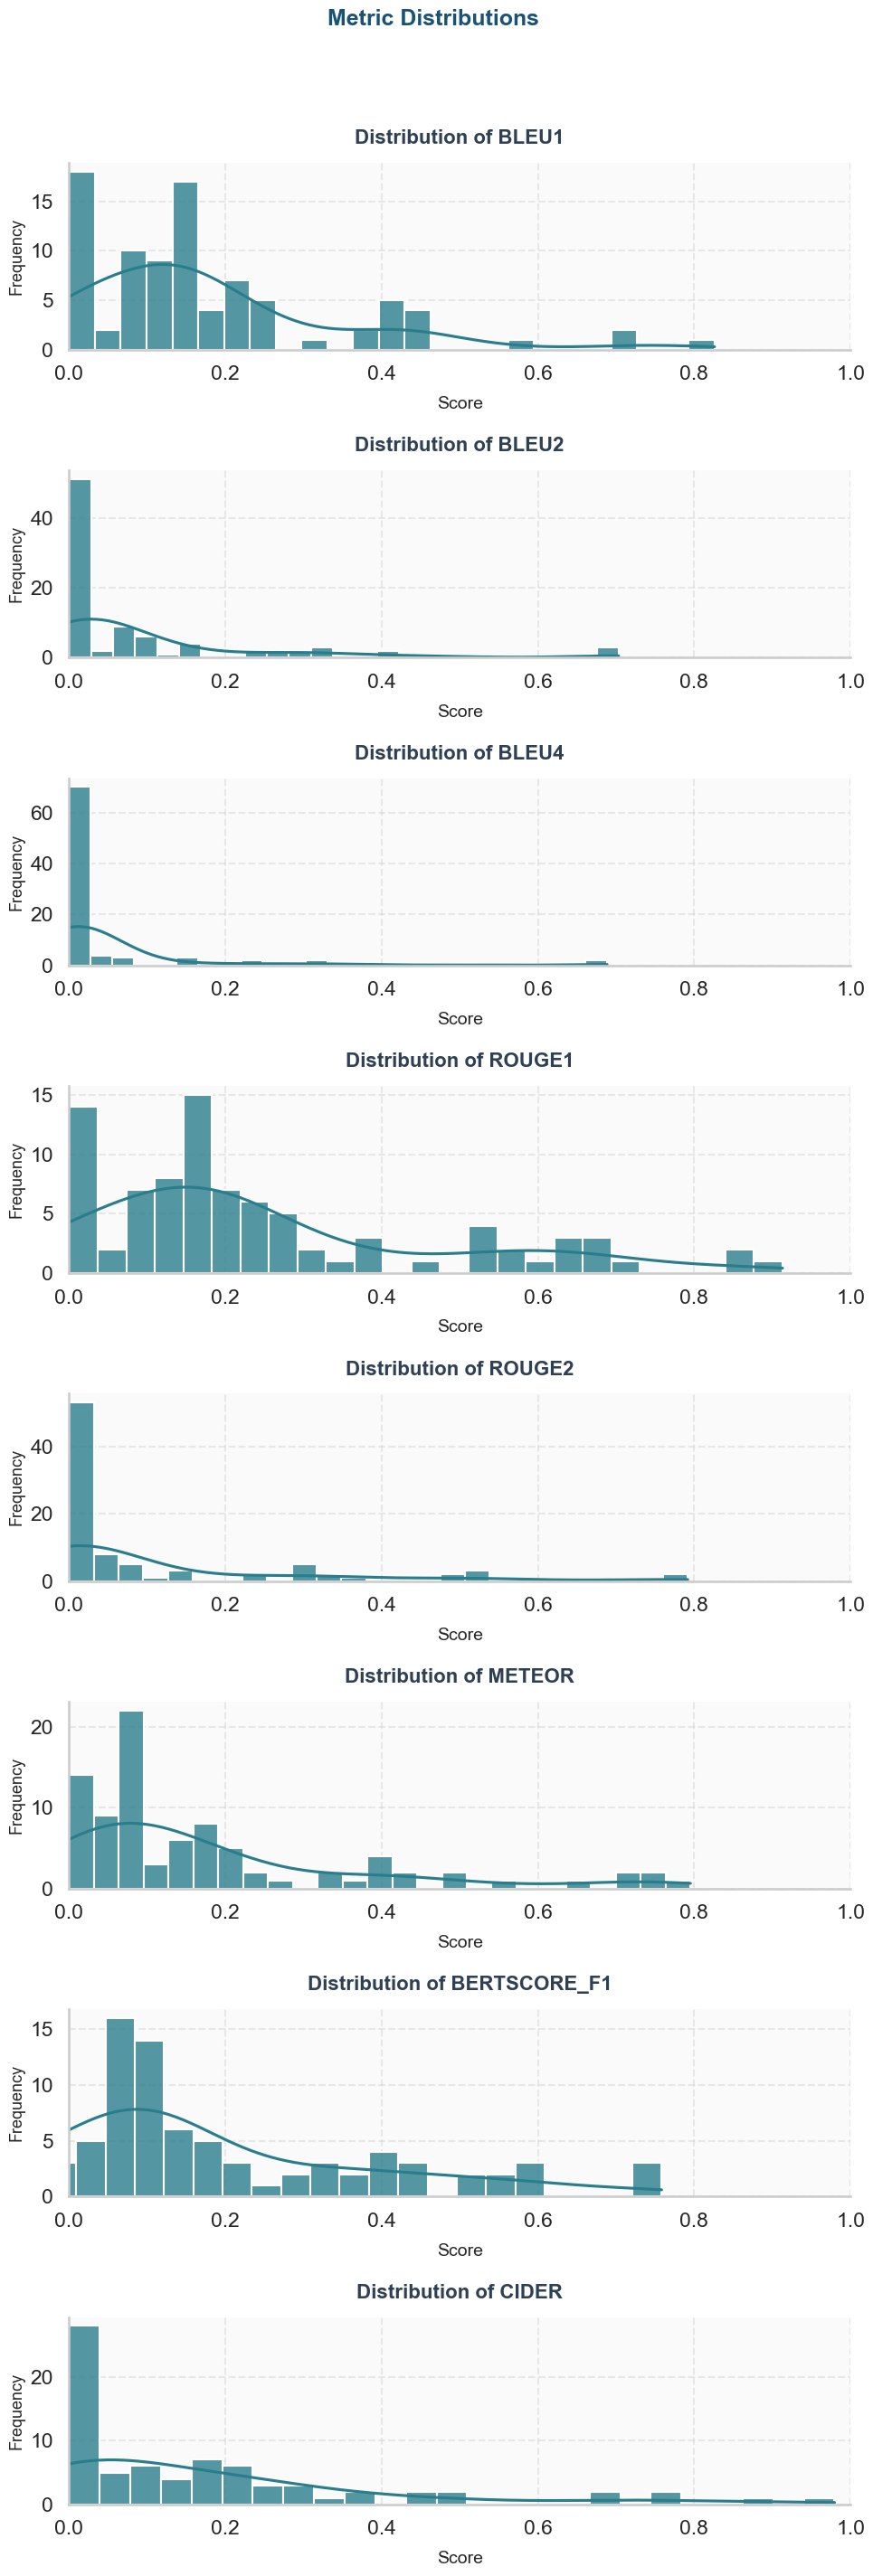

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization style
sns.set_theme(style="whitegrid", context="talk")

shift_value = 0  # the constant value to add
metrics_to_plot = [m for m in ['bleu1','bleu2','bleu4','rouge1','rouge2','meteor','bertscore_f1','cider'] if m in df.columns]

fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(10, 3.5 * max(1, len(metrics_to_plot))))

if len(metrics_to_plot) == 1:
    axes = [axes]

for ax, m in zip(axes, metrics_to_plot):
    # Shift metric and filter values <= 1.0
    shifted_values = (df[m].dropna() + shift_value)
    shifted_values = shifted_values[shifted_values <= 1.0]
    
    # Plot histogram and KDE
    sns.histplot(
        shifted_values,
        kde=True,
        bins=25,
        color=sns.color_palette("crest", 8)[4],
        alpha=0.8,
        ax=ax
    )

    # Titles and labels
    ax.set_title(f"Distribution of {m.upper()}",
                 fontsize=16, fontweight='bold', color='#2E4053', pad=15)
    ax.set_xlabel("Score", fontsize=14, labelpad=10)
    ax.set_ylabel("Frequency", fontsize=13)

    # Aesthetic styling
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_facecolor("#FAFAFA")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 1)

plt.suptitle("Metric Distributions ",
             fontsize=18, fontweight='bold', color='#1A5276', y=1.02)
plt.tight_layout()
plt.show()


## Per-movie performance (top by evaluated_shots)

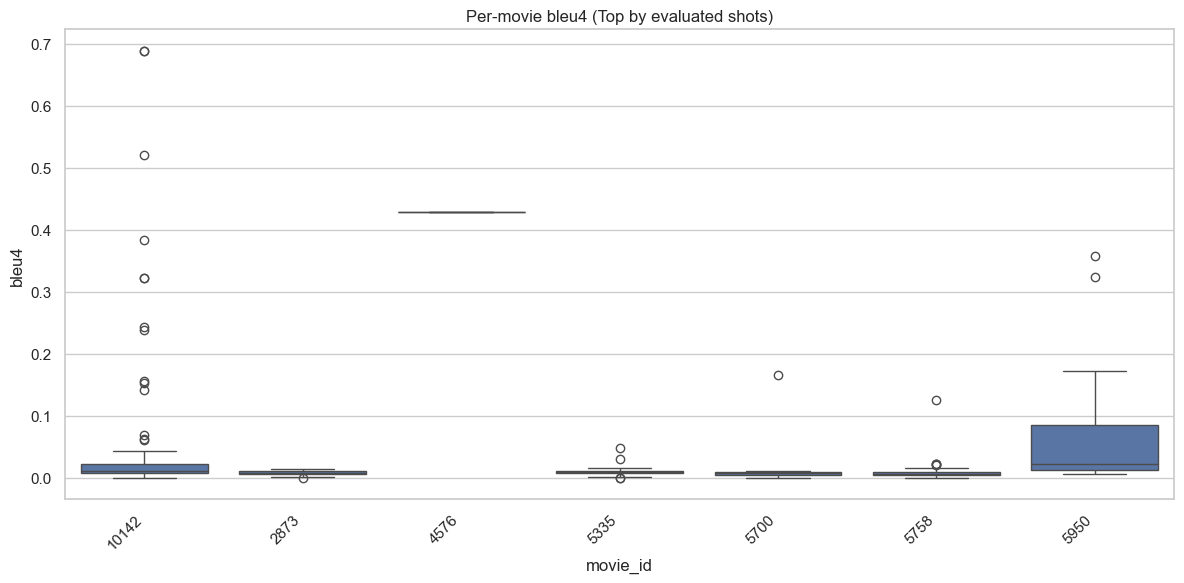

In [6]:
top_movies = (df.groupby('movie_id')['shot_id'].count().sort_values(ascending=False).head(10).index
              if 'movie_id' in df.columns else [])
metric = 'bleu4' if 'bleu4' in df.columns else (metrics_to_plot[0] if metrics_to_plot else None)
if metric and len(top_movies) > 0:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[df['movie_id'].isin(top_movies)], x='movie_id', y=metric)
    plt.title(f'Per-movie {metric} (Top by evaluated shots)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('No suitable metric or movies to plot.')

## Relationship between length and quality

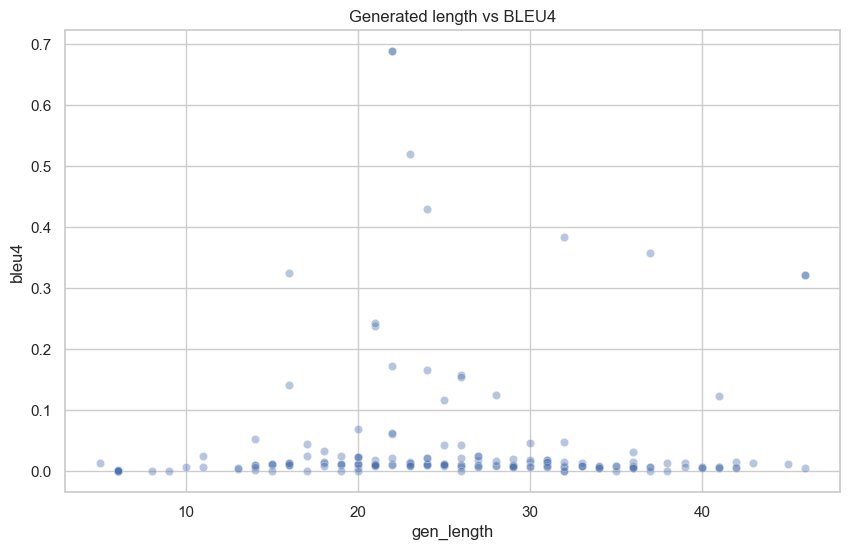

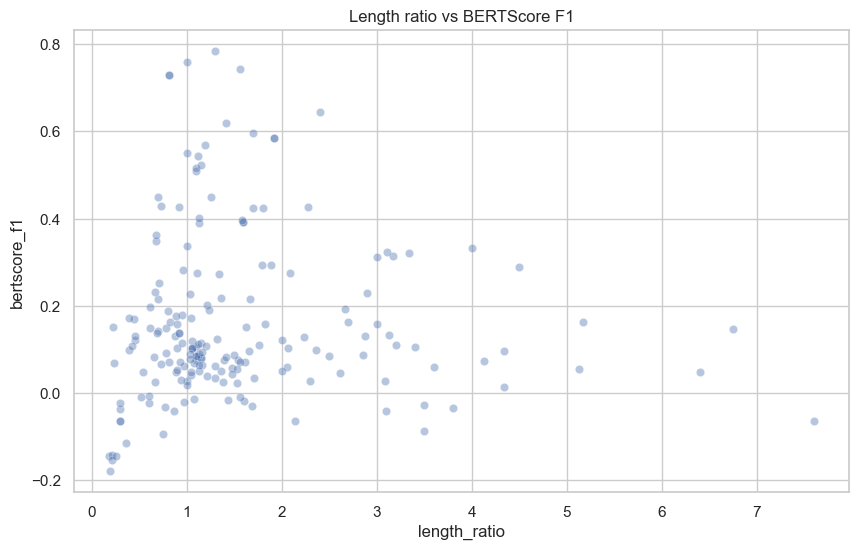

In [7]:
if 'gen_length' in df.columns and 'bleu4' in df.columns:
    sns.scatterplot(data=df, x='gen_length', y='bleu4', alpha=0.4)
    plt.title('Generated length vs BLEU4')
    plt.show()

if 'length_ratio' in df.columns and 'bertscore_f1' in df.columns:
    sns.scatterplot(data=df, x='length_ratio', y='bertscore_f1', alpha=0.4)
    plt.title('Length ratio vs BERTScore F1')
    plt.show()

## Retrieval quality (if present)

In [8]:
# Some result files may include retrieval distances under different keys; normalize if available
retr_cols = [c for c in df.columns if 'distance' in c or 'retrieval' in c]
retr_cols

[]